In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import folium
import bokeh
import seaborn as sns

In [12]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
file_path = "./M1045_MonthlyCrimeDashboard_TNOCrimeData.xlsx"
xls = pd.ExcelFile(file_path)

print(xls.sheet_names)

sheet_name = xls.sheet_names[0]
df = pd.read_excel(xls, engine="openpyxl")

csv_file_path = "crime_data.csv"
df.to_csv(csv_file_path, index=False)

print(f"CSV file saved as: {csv_file_path}")

['MPS_MonthlyCrimeDashboard_TNOCr']
CSV file saved as: crime_data.csv


In [6]:
#Convert Month_Year to datetime format
file_path = "./crime_data.csv"
crime_df = pd.read_csv(file_path)

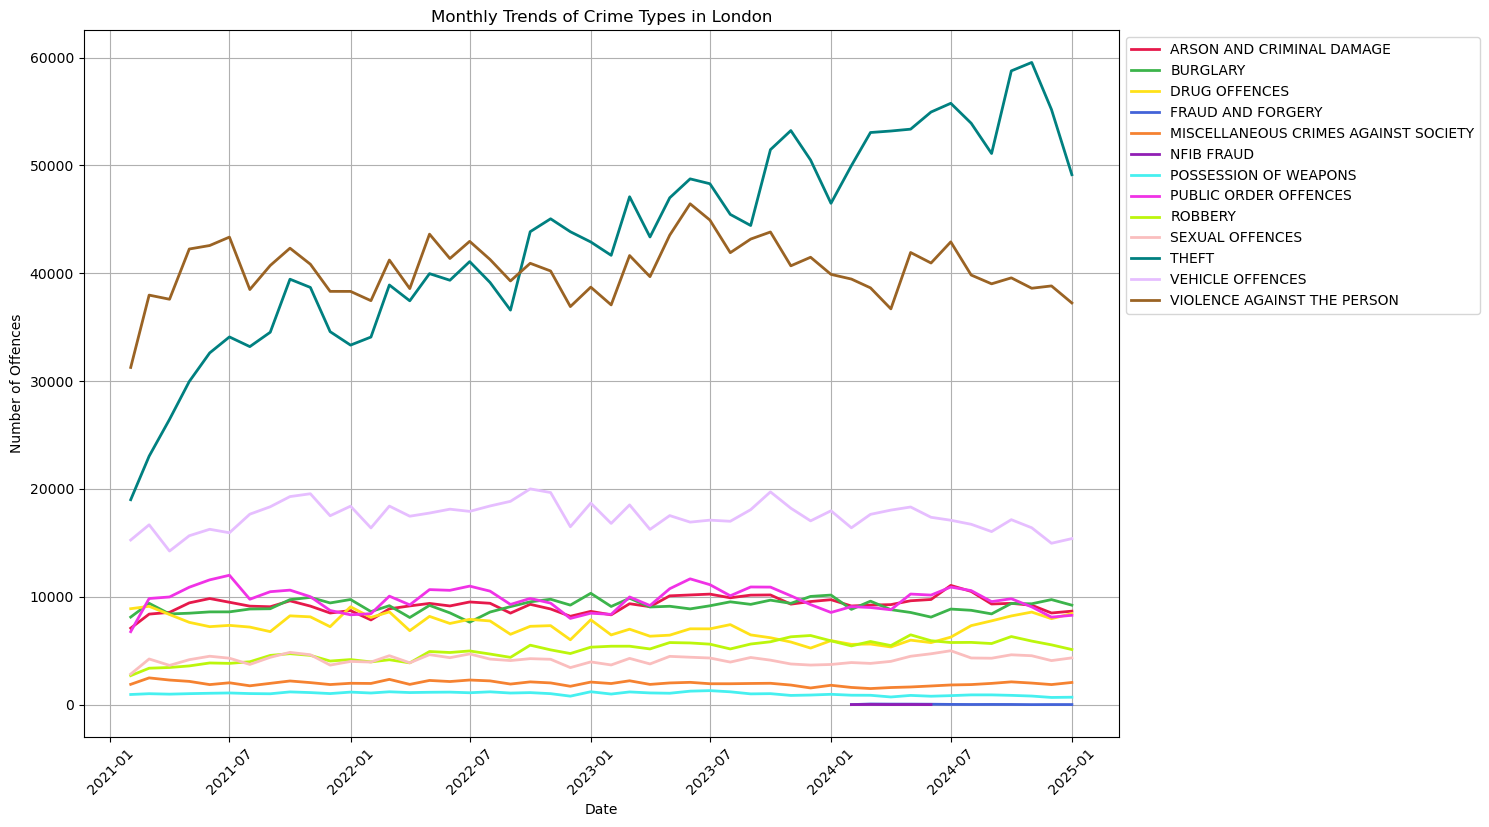

In [34]:
#Visualization 1 (Multi-line Time Series Chart - Q1)
crime_offences = crime_df[crime_df["Measure"] == "Offences"]

# Grouping by Month_Year and Offence Group to observe trends
crime_trend_grouped = crime_offences.groupby(["Month_Year", "Offence Group"])["Count"].sum().reset_index()

# Convert Month_Year to datetime for sorting and plotting
crime_trend_grouped["Month_Year"] = pd.to_datetime(crime_trend_grouped["Month_Year"])

# Pivot the data to have offence groups as columns
crime_trend_pivot = crime_trend_grouped.pivot(index="Month_Year", columns="Offence Group", values="Count")

#Defines a color map: custom Hex codes
user_colors = [
    "#E6194B", "#3CB44B", "#FFE119", "#4363D8",
    "#F58231", "#911EB4", "#46F0F0", "#F032E6",
    "#BCF60C", "#FABEBE", "#008080", "#E6BEFF",
    "#9A6324"
]

# Plot
plt.figure(figsize=(15, 8))
for i, column in enumerate(crime_trend_pivot.columns):
    colors = user_colors[i % len(user_colors)]
    plt.plot(crime_trend_pivot.index, crime_trend_pivot[column], label=column, color=colors, linewidth=2)

plt.title("Monthly Trends of Crime Types in London")
plt.xlabel("Date")
plt.ylabel("Number of Offences")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

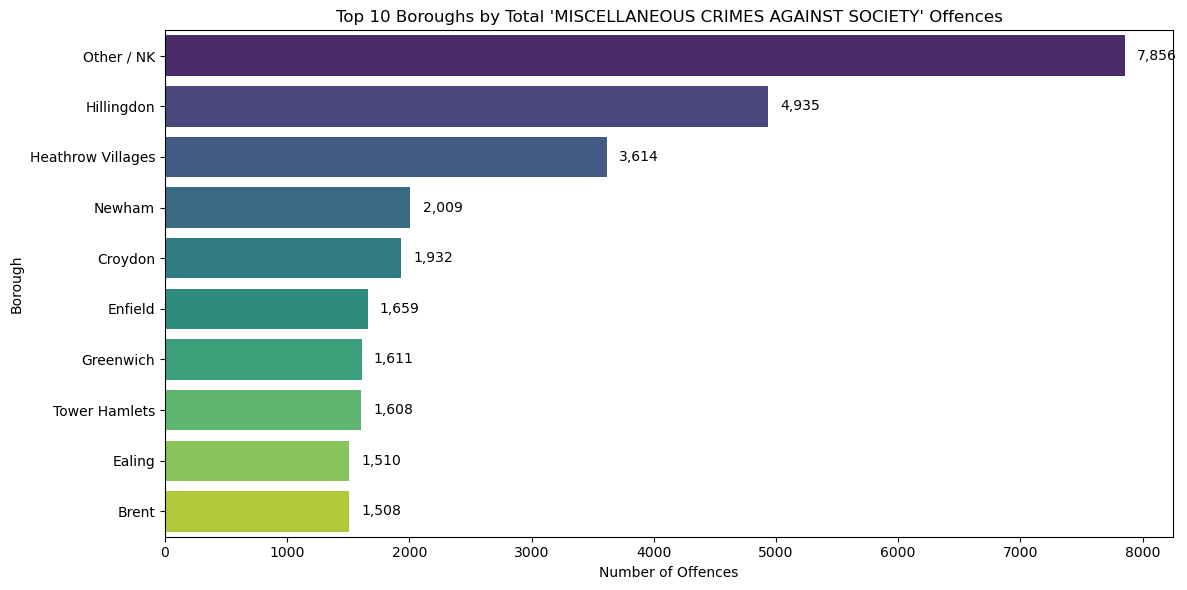

In [109]:
#Visualization 2: Horizontal Bar Chart with annotations
selected_offence = "MISCELLANEOUS CRIMES AGAINST SOCIETY"
q3_df = crime_df[(crime_df["Measure"] == "Offences") & (crime_df["Offence Group"] == selected_offence)]
q3_grouped = q3_df.groupby("Area name")["Count"].sum().reset_index()
top_boroughs_q3 = q3_grouped.sort_values(by="Count", ascending=False).head(10)

# Plot with total values at end of bars
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_boroughs_q3, x="Count", y="Area name", hue="Area name", palette="viridis", legend=False)

# Add annotations
for i, value in enumerate(top_boroughs_q3["Count"]):
    plt.text(value + 100, i, f"{value:,}", va='center', fontsize=10)

plt.title(f"Top 10 Boroughs by Total '{selected_offence}' Offences")
plt.xlabel("Number of Offences")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()

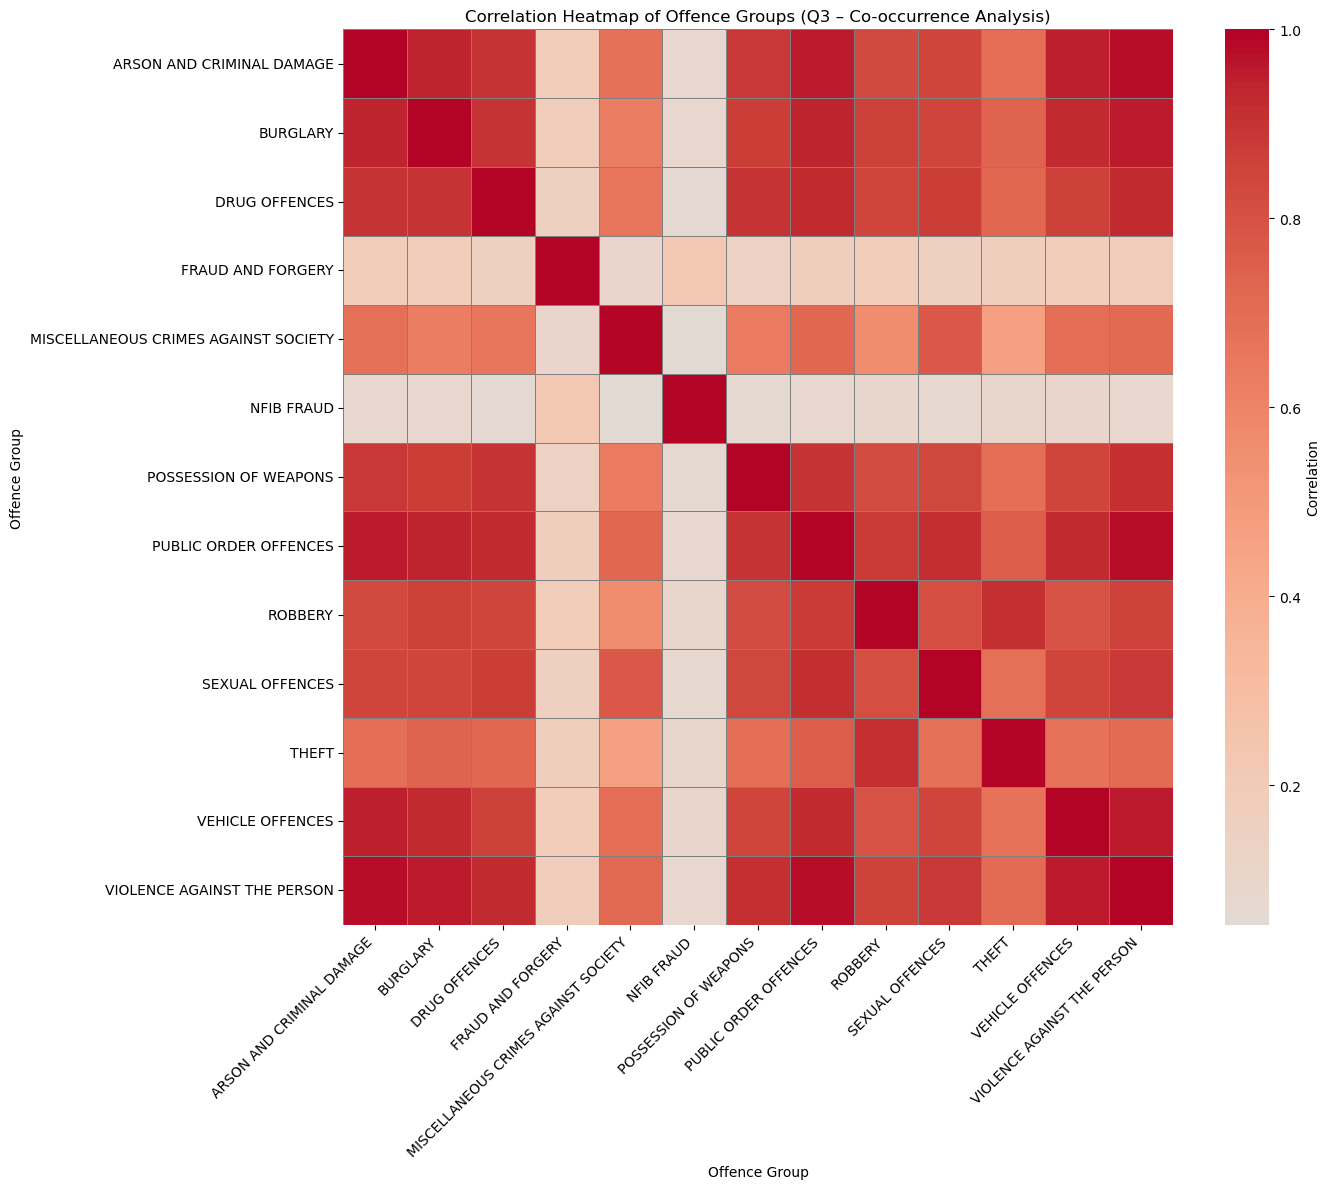

In [ ]:
#Filter for "Offences" and keep relevant columns
q5_df = crime_df[crime_df["Measure"] == "Offences"]
q5_df = q5_df[["Month_Year", "Area name", "Offence Group", "Count"]]

#Group by Month, Borough, and Offence Group
q5_grouped = q5_df.groupby(["Month_Year", "Area name", "Offence Group"])["Count"].sum().reset_index()

#Pivot to create a matrix: rows = (Month_Year, Borough), columns = Offence Groups
q5_pivot = q5_grouped.pivot_table(index=["Month_Year", "Area name"], columns="Offence Group", values="Count", fill_value=0)

#Compute correlation between offence types
correlation_matrix = q5_pivot.corr()

#Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=False, linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap of Offence Groups (Co-occurrence Analysis)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()